In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-students-dropout-and-academic-success/dataset.csv


In [2]:
pd.set_option('display.max_columns', None)  # display all columns

students=pd.read_csv("/kaggle/input/predict-students-dropout-and-academic-success/dataset.csv")

students

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,5,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,10,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,10,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,5,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

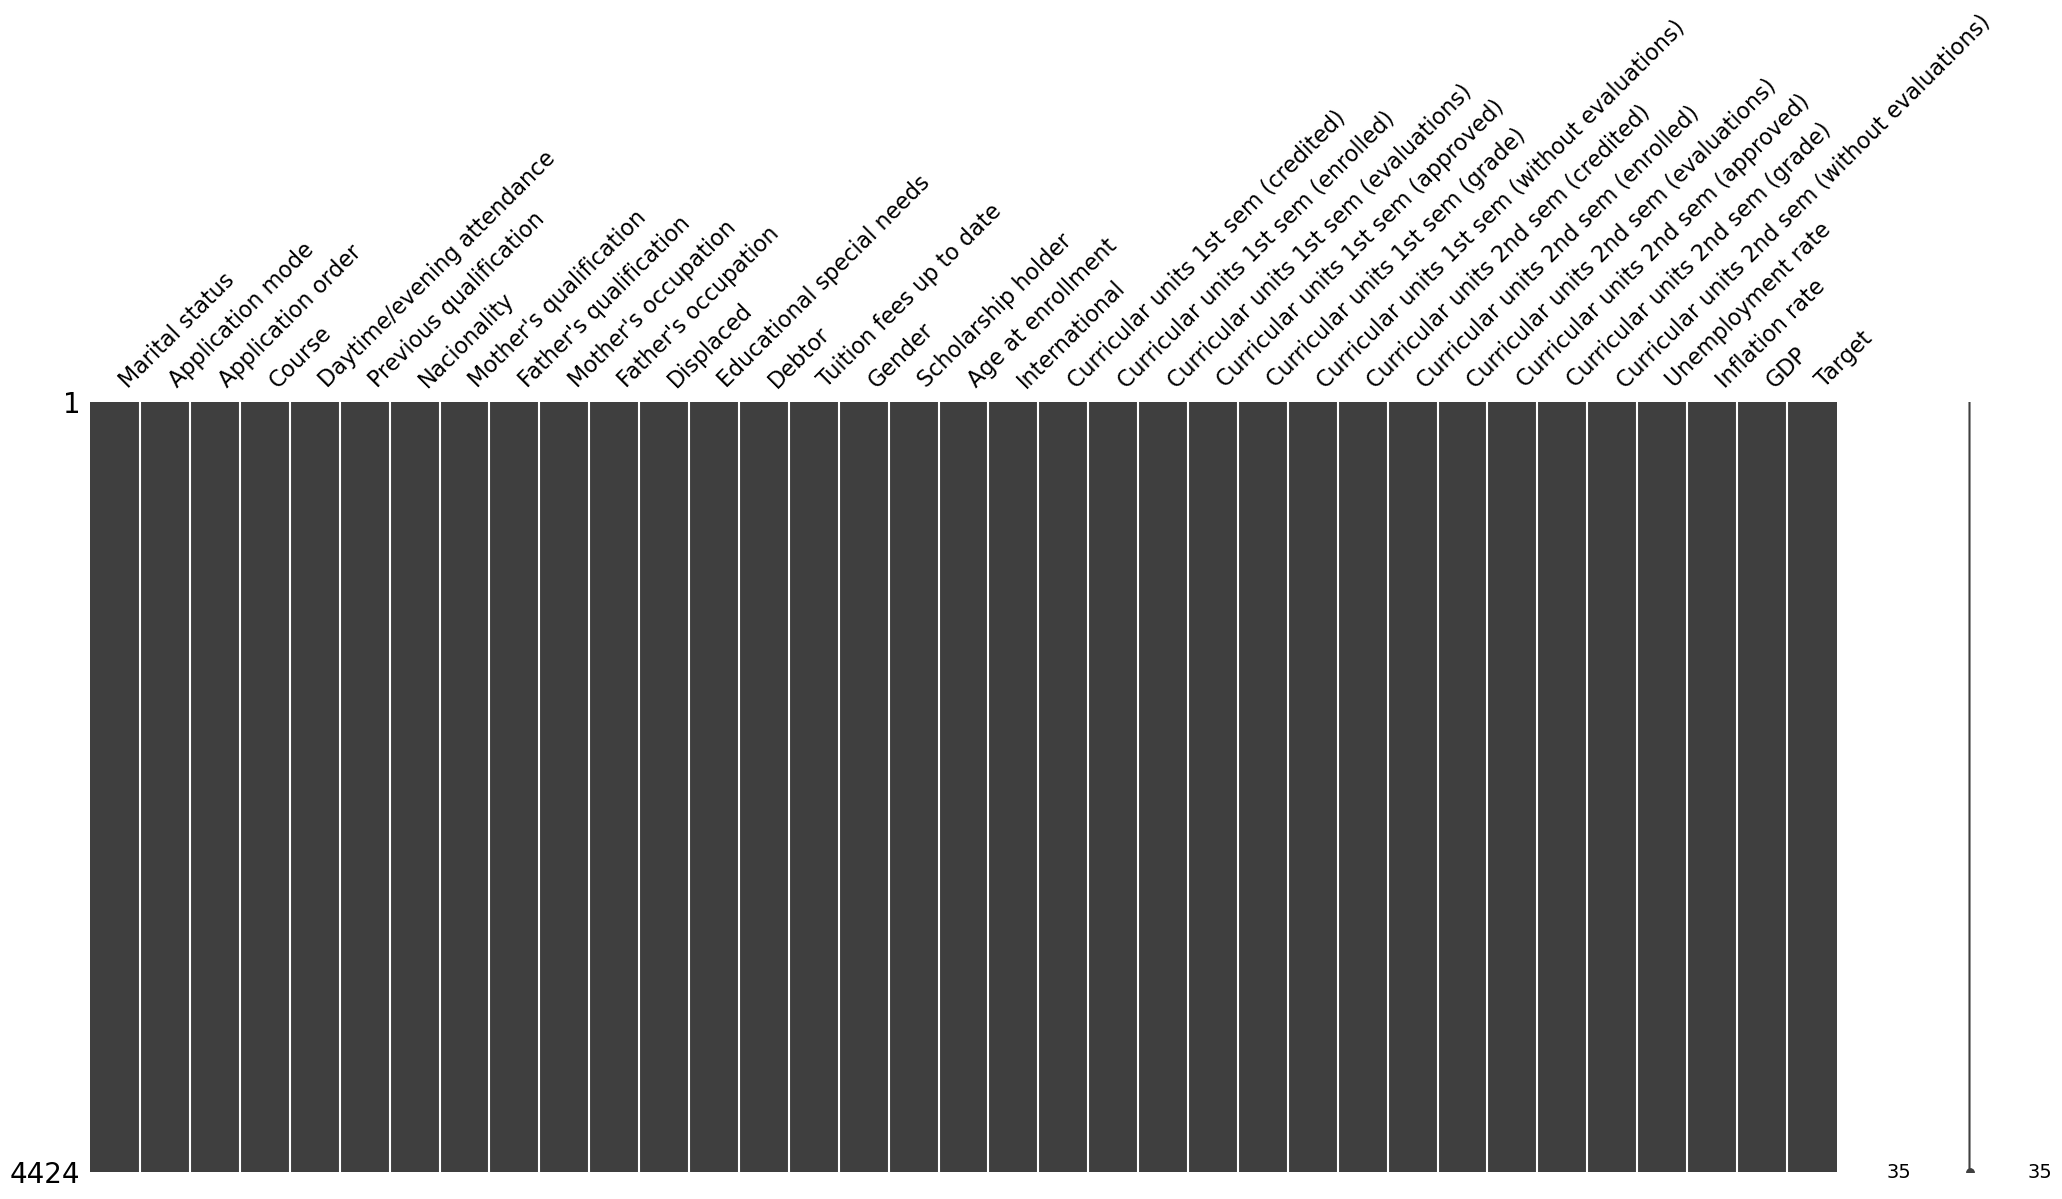

In [3]:
import missingno as msno   # checking for missing values
msno.matrix(students)

# **Exploratory Data Analysis**

In [4]:
print(students.head())

   Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  \
0                      13                      10                    6   
1                       1         

In [5]:
print(students.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [6]:
print(students.describe())

       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571          6.886980           1.727848     9.899186   
std          0.605747          5.298964           1.313793     4.331792   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    10.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           9.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nacionality  \
count                 4424.000000             4424.000000  4424.000000   
mean                     0.890823                2.531420     1.254521   
std                      0.311897                3.963707     1.748447   
min                      0.0

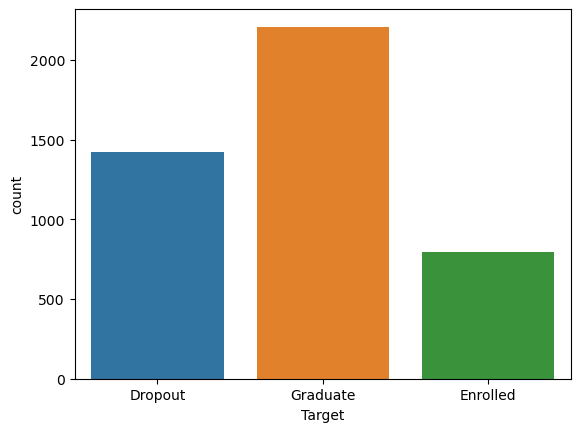

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Visualizing the distribution of the target variable 'Target'
sns.countplot(x='Target', data=students)
plt.show()


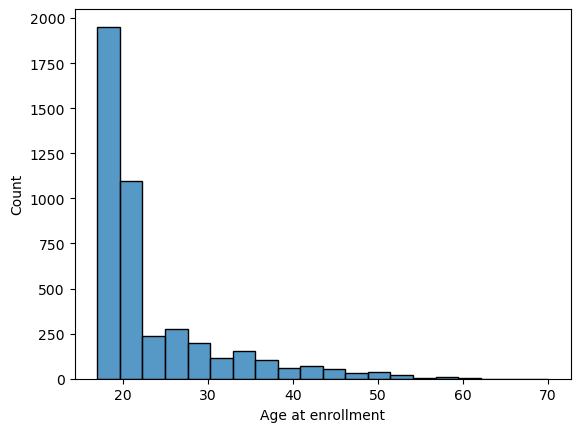

In [8]:
# Example: Visualizing the distribution of numerical features
sns.histplot(data=students, x='Age at enrollment', bins=20)
plt.show()

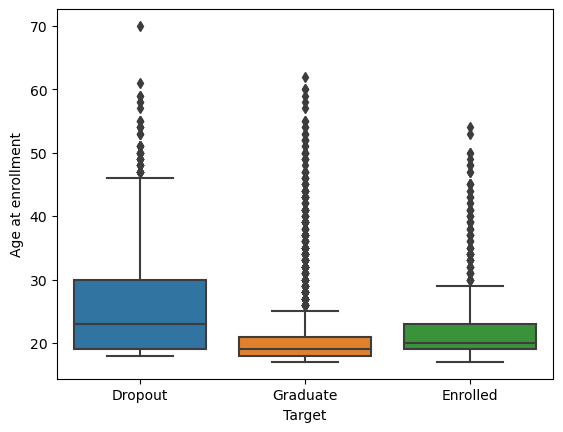

In [9]:
# Example: Visualizing the relationship between numerical features and the target
sns.boxplot(x='Target', y='Age at enrollment', data=students)
plt.show()

/tmp/ipykernel_20/3174663291.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = students.corr()


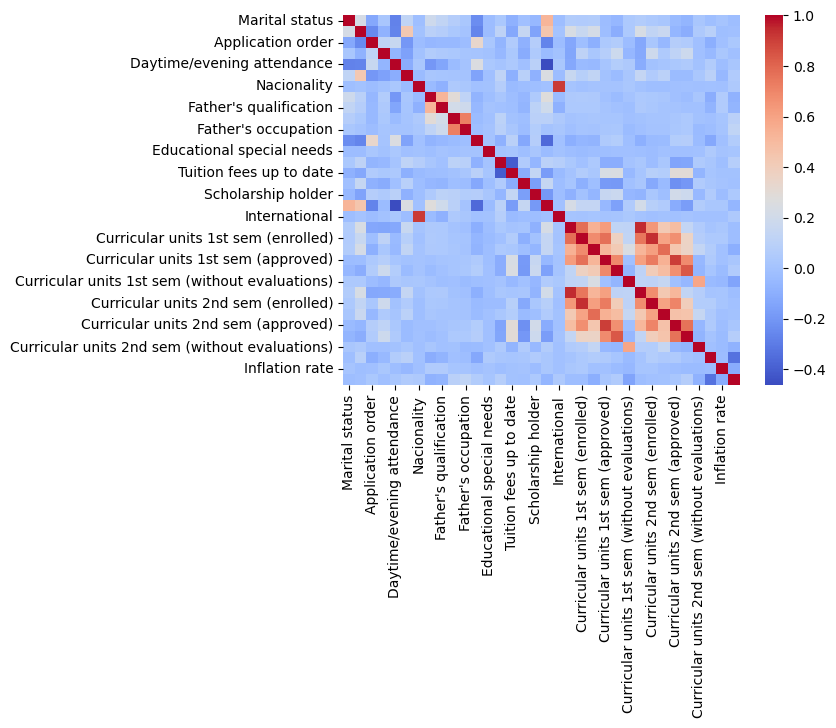

In [10]:
# Example: Visualizing the correlation matrix
correlation_matrix = students.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

# **Feature Analysis**

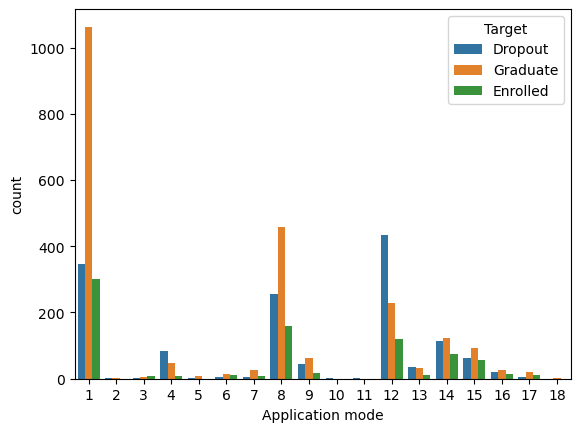

In [11]:
# Example: Analyzing the relationship between 'Application mode' and 'Target'
sns.countplot(x='Application mode', hue='Target', data=students)
plt.show()

In [12]:
# Example: Grouping by 'Target' and calculating the mean of 'Age at enrollment'
students.groupby('Target')['Age at enrollment'].mean()

Target
Dropout     26.068966
Enrolled    22.369018
Graduate    21.783612
Name: Age at enrollment, dtype: float64

# **Visualizing Categorical Features**

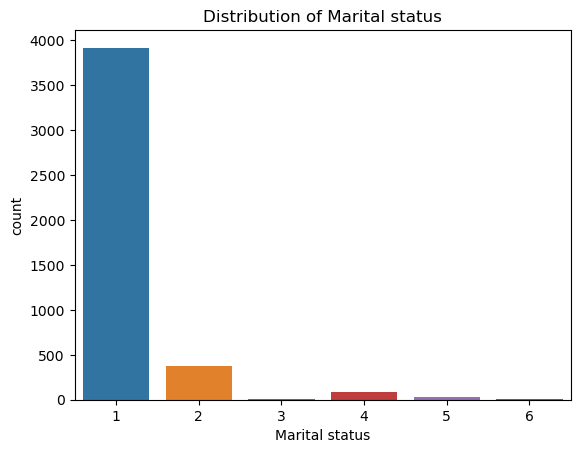

In [13]:
# Example: Visualizing the distribution of 'Marital status' using a bar plot
sns.countplot(x='Marital status', data=students)
plt.title('Distribution of Marital status')
plt.show()

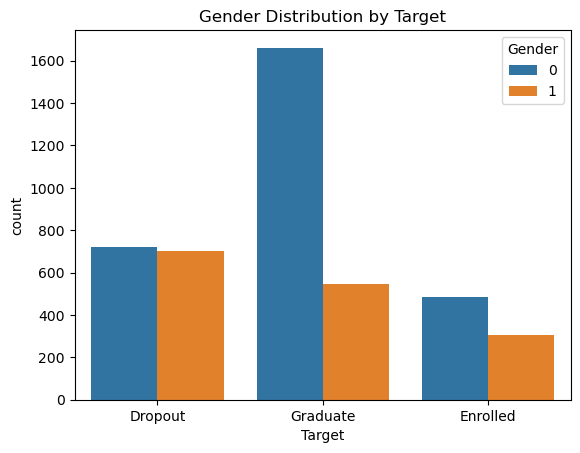

In [14]:
# Example: Visualizing the proportion of 'Gender' in each target category
sns.countplot(x='Target', hue='Gender', data=students)
plt.title('Gender Distribution by Target')
plt.show()

# **Visualizing Numerical Features**

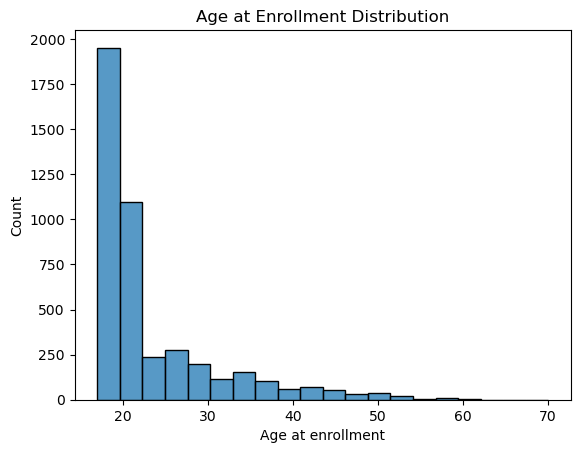

In [15]:
# Example: Visualizing the distribution of 'Age at enrollment' using a histogram
sns.histplot(data=students, x='Age at enrollment', bins=20)
plt.title('Age at Enrollment Distribution')
plt.show()

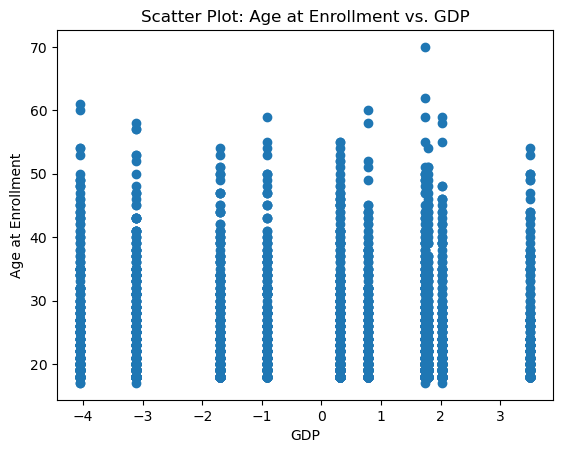

In [16]:
# Example: Visualizing the relationship between 'Age at enrollment' and 'GDP' using a scatter plot
plt.scatter(students['GDP'], students['Age at enrollment'])
plt.xlabel('GDP')
plt.ylabel('Age at Enrollment')
plt.title('Scatter Plot: Age at Enrollment vs. GDP')
plt.show()

# **Grouping and Aggregating Data**

In [17]:
# Example: Grouping by 'Target' and calculating the average 'Age at enrollment' for each category
average_age_by_target = students.groupby('Target')['Age at enrollment'].mean()
print(average_age_by_target)

Target
Dropout     26.068966
Enrolled    22.369018
Graduate    21.783612
Name: Age at enrollment, dtype: float64


# **Pair Plots (Scatter Matrix)**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


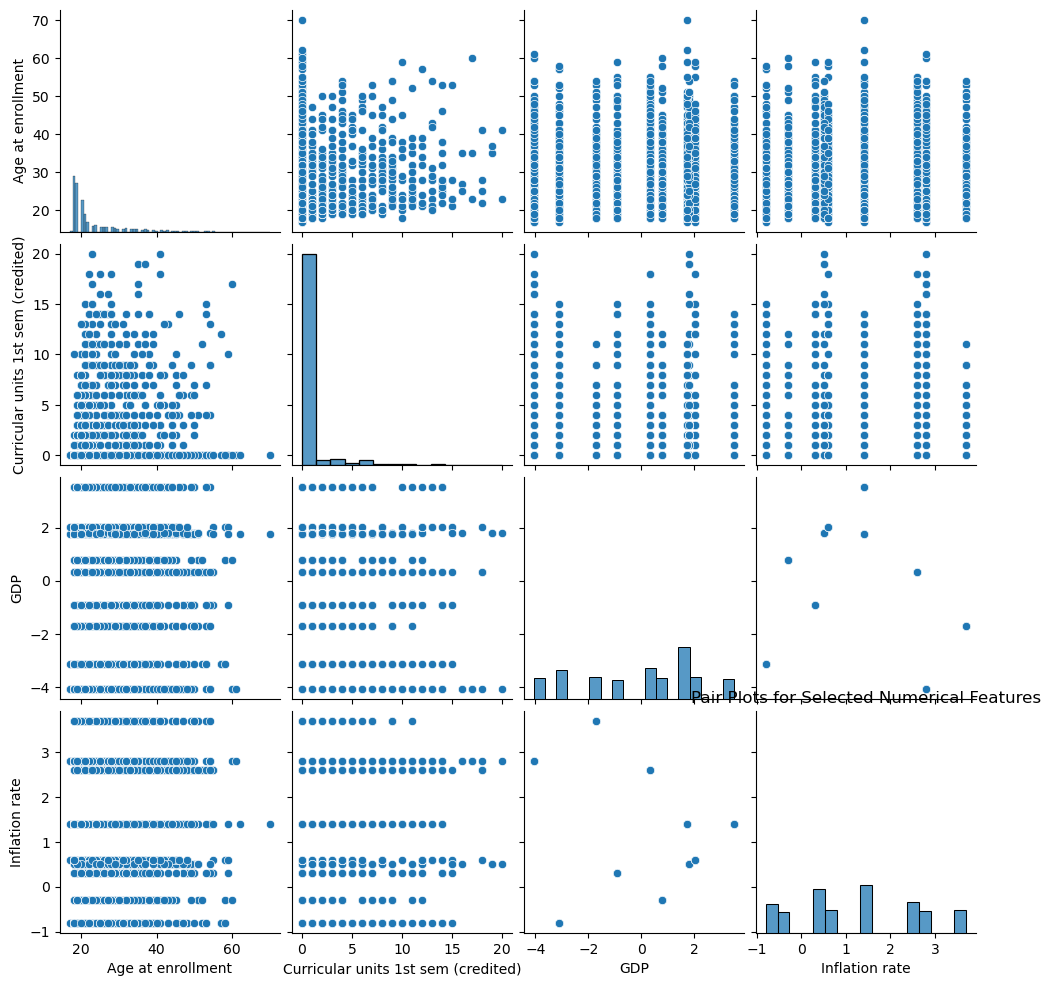

In [18]:
# Example: Creating pair plots for selected numerical features
selected_features = ['Age at enrollment', 'Curricular units 1st sem (credited)', 'GDP', 'Inflation rate']
sns.pairplot(students[selected_features])
plt.title('Pair Plots for Selected Numerical Features')
plt.show()

# **Box Plots**

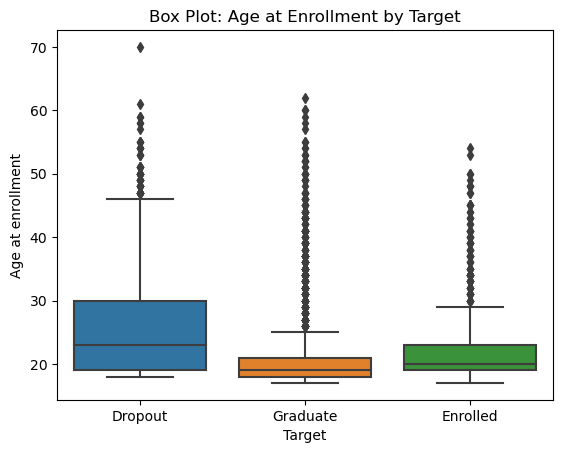

In [19]:
# Example: Comparing the distribution of 'Age at enrollment' for each 'Target' category using box plots
sns.boxplot(x='Target', y='Age at enrollment', data=students)
plt.title('Box Plot: Age at Enrollment by Target')
plt.show()

## **Hypothesis 1**: Students with a scholarship have higher average enrollment age compared to students without a scholarship.

## **Hypothesis 2**: There is a significant difference in the average enrollment age between students who dropped out and students who graduated.

##### To confirm or reject these hypotheses, we can use a statistical test called the t-test. Specifically, we'll perform an independent t-test for Hypothesis 1 and a two-sample t-test for Hypothesis 2.

In [20]:
import pandas as pd
import scipy.stats as stats

# Separate data for students with and without scholarships
students_with_scholarship = students[students['Scholarship holder'] == 1]
students_without_scholarship = students[students['Scholarship holder'] == 0]

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(students_with_scholarship['Age at enrollment'], students_without_scholarship['Age at enrollment'])

print("Hypothesis 1 Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Hypothesis 1 is statistically significant: Students with a scholarship have a higher average enrollment age.")
else:
    print("Hypothesis 1 is not statistically significant: No significant difference in average enrollment age based on scholarships.")

# Hypothesis 2: There is a significant difference in the average enrollment age between students who dropped out and students who graduated

# Separate data for students who dropped out and students who graduated
students_dropped_out = students[students['Target'] == 'Dropout']
students_graduated = students[students['Target'] == 'Graduate']

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(students_dropped_out['Age at enrollment'], students_graduated['Age at enrollment'])

print("\nHypothesis 2 Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Hypothesis 2 is statistically significant: There is a significant difference in average enrollment age between students who dropped out and students who graduated.")
else:
    print("Hypothesis 2 is not statistically significant: No significant difference in average enrollment age between students who dropped out and students who graduated.")


Hypothesis 1 Results:
T-Statistic: -12.863228416690717
P-Value: 3.342717371429861e-37
Hypothesis 1 is statistically significant: Students with a scholarship have a higher average enrollment age.

Hypothesis 2 Results:
T-Statistic: 16.703451025530377
P-Value: 2.113885168983687e-60
Hypothesis 2 is statistically significant: There is a significant difference in average enrollment age between students who dropped out and students who graduated.


# **Categorical EDA**

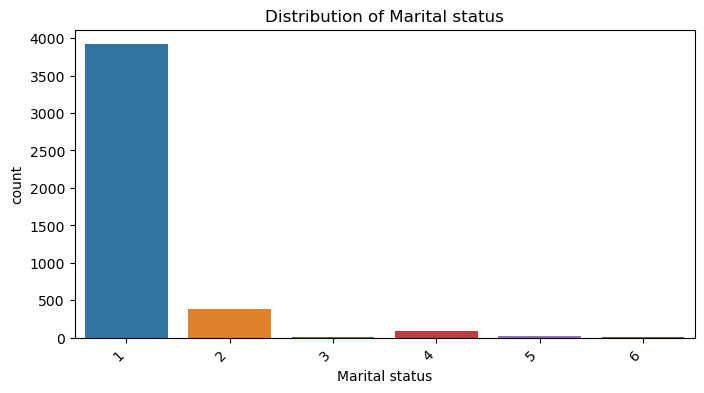

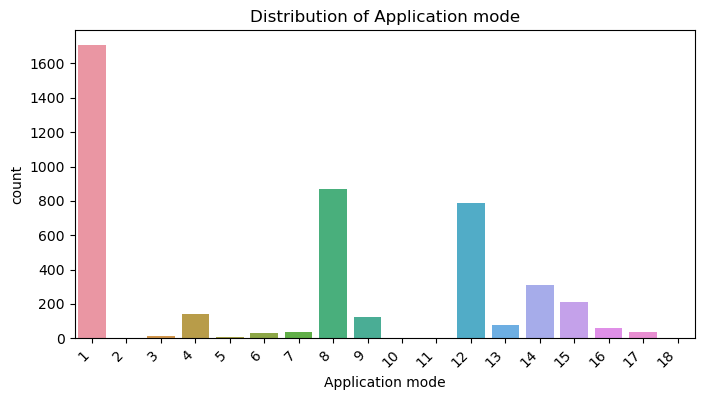

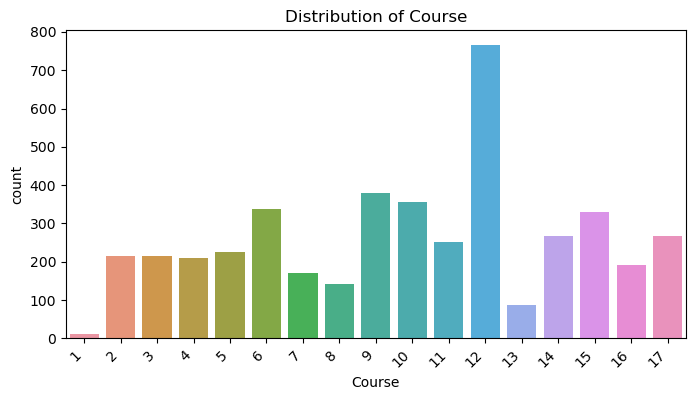

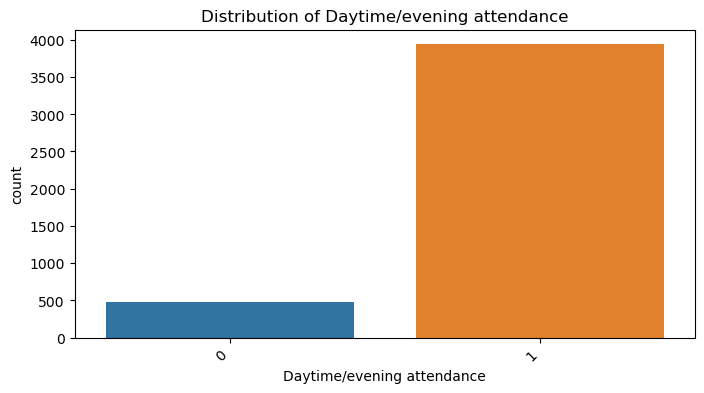

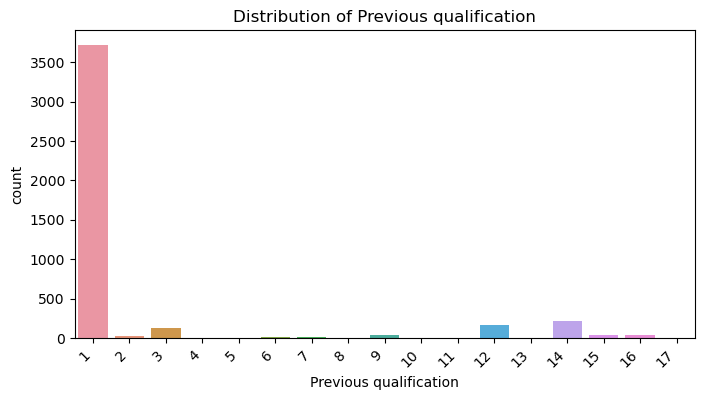

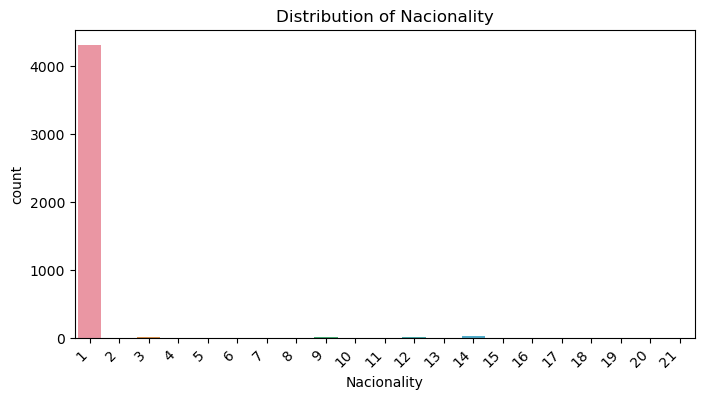

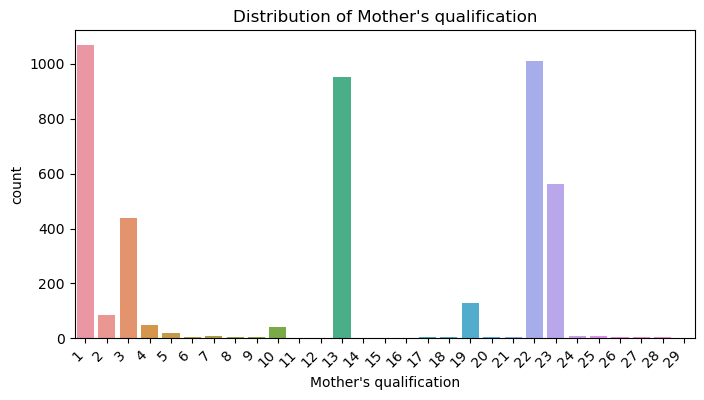

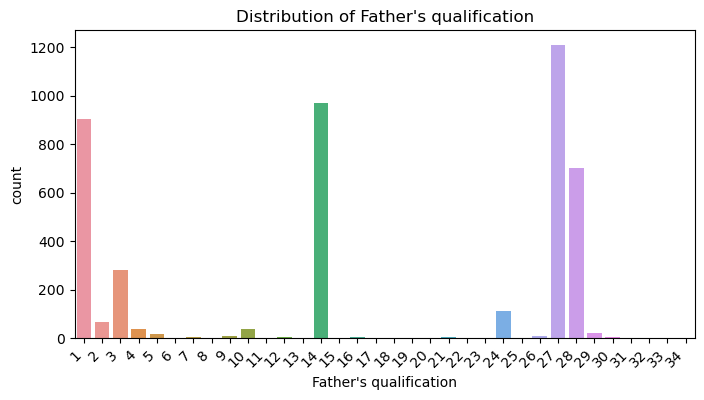

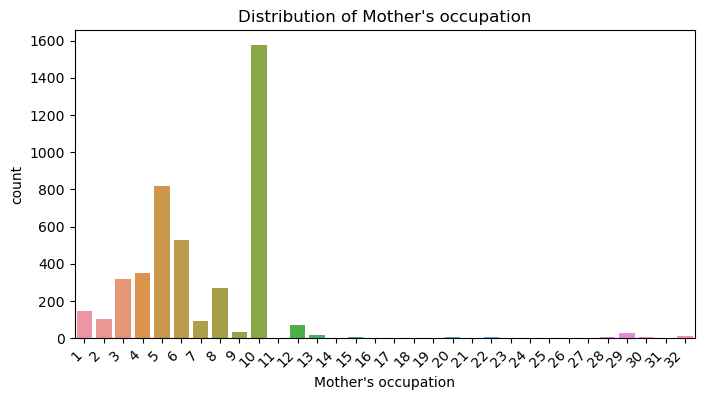

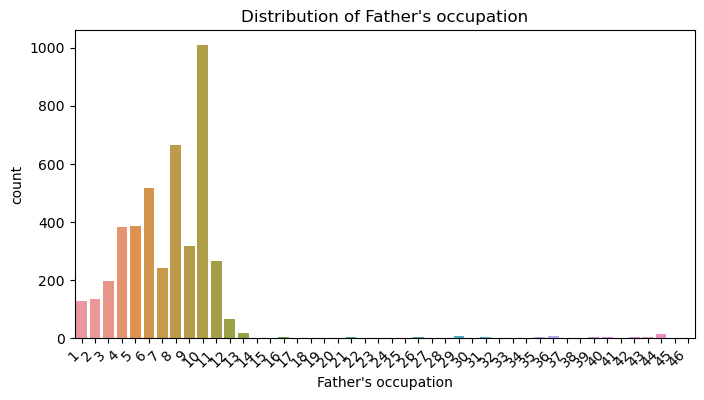

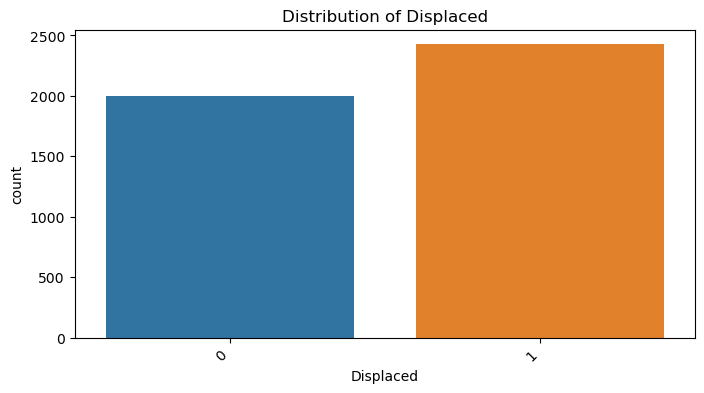

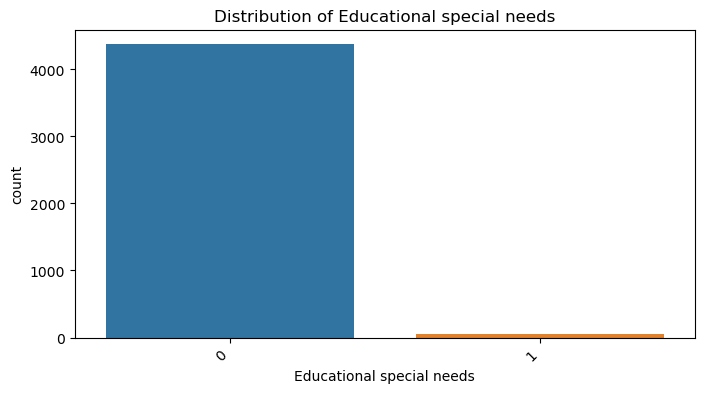

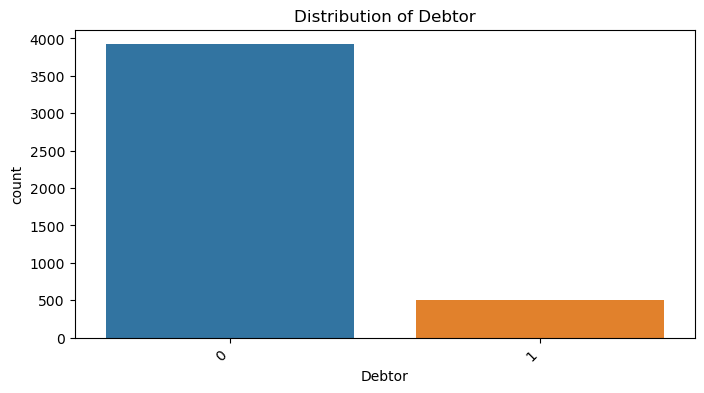

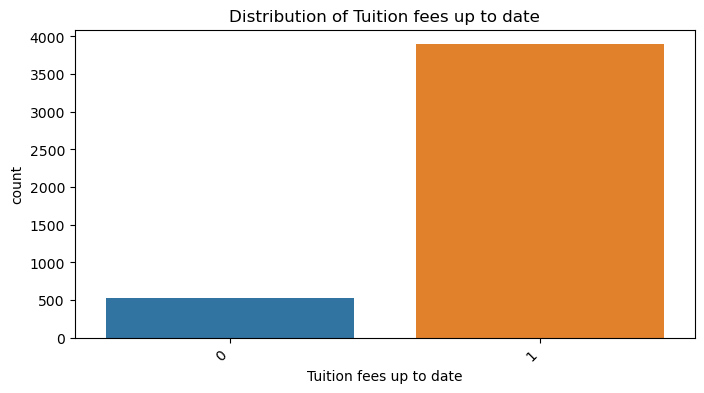

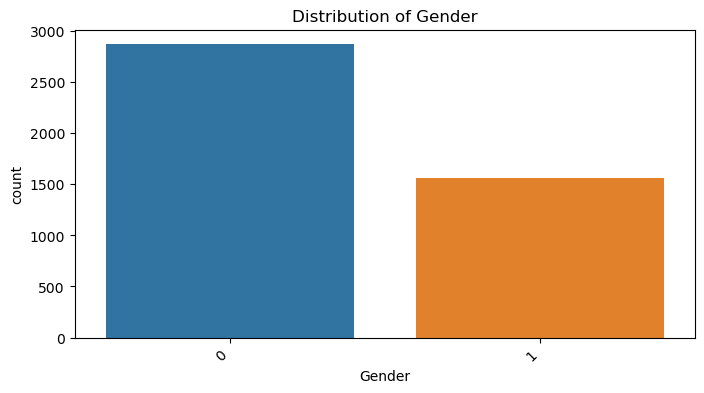

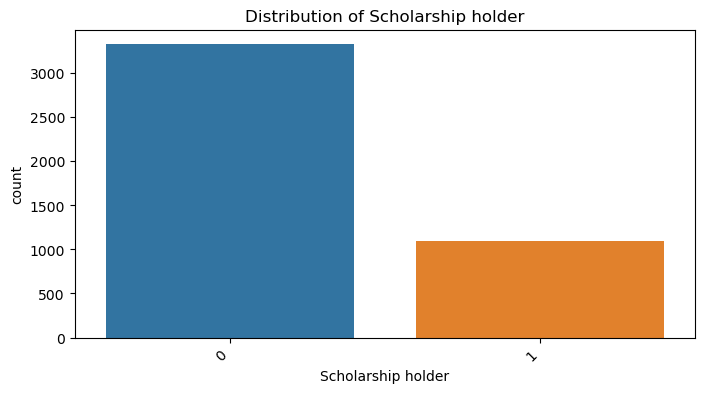

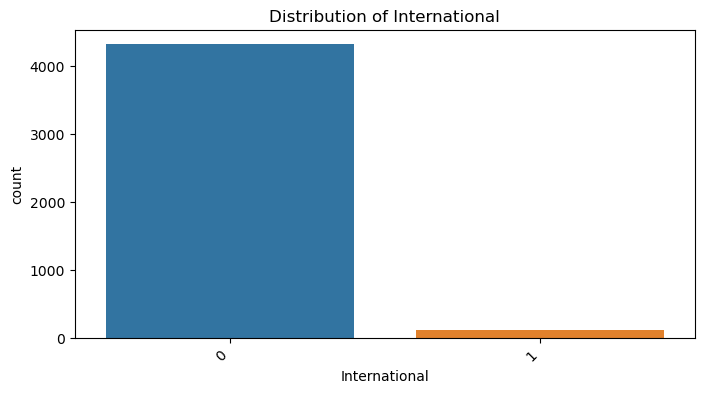

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical Columns
categorical_columns = [
    'Marital status', 'Application mode', 'Course', 'Daytime/evening attendance',
    'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification",
    "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs',
    'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International'
]

# Loop through each categorical column and plot the countplot
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=students, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45, ha='right')
    plt.show()


# **Determining Model performance**

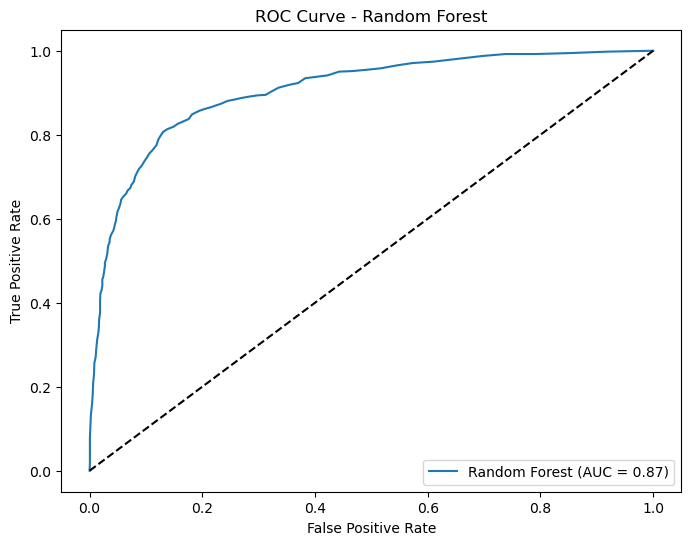


Model: Random Forest
Precision: 0.72
Recall: 0.68
Accuracy: 0.77
F1 Score: 0.68


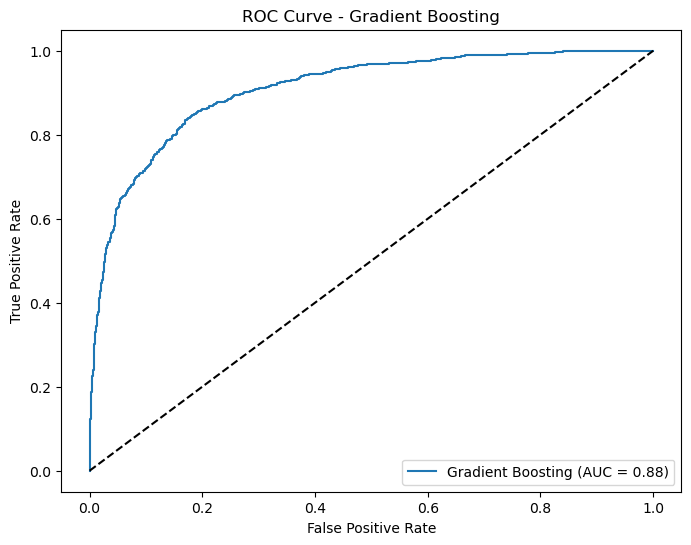


Model: Gradient Boosting
Precision: 0.69
Recall: 0.66
Accuracy: 0.75
F1 Score: 0.66


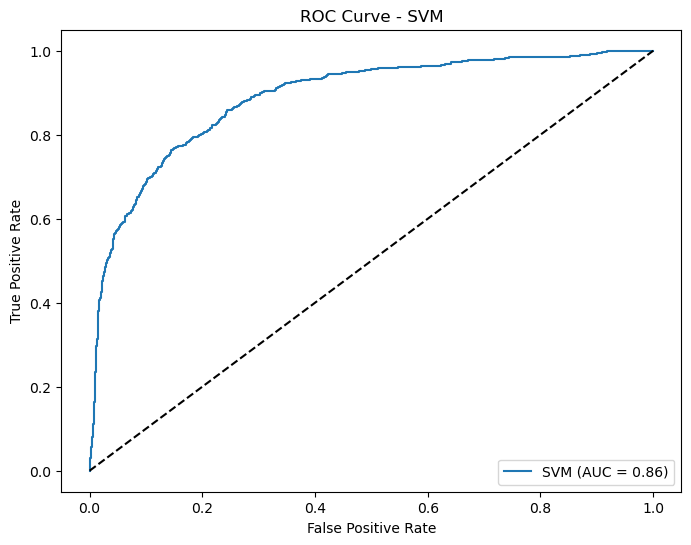


Model: SVM
Precision: 0.68
Recall: 0.62
Accuracy: 0.73
F1 Score: 0.63


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


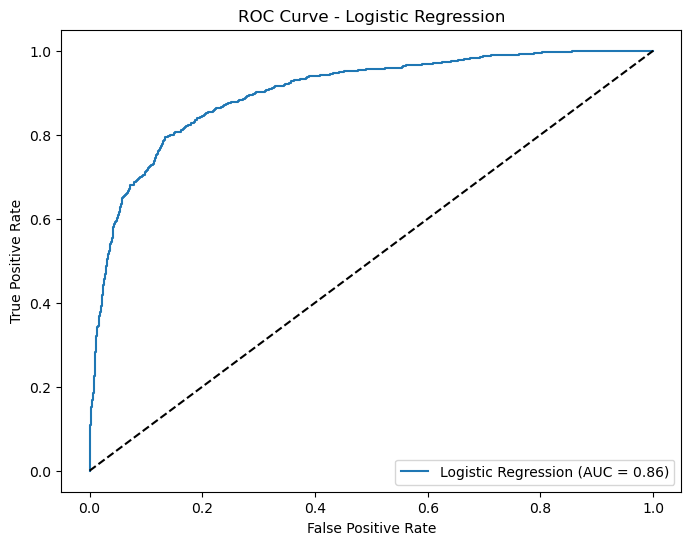


Model: Logistic Regression
Precision: 0.70
Recall: 0.64
Accuracy: 0.76
F1 Score: 0.64


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score, roc_curve

# Preprocess the categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    students[column] = label_encoder.fit_transform(students[column])

# Prepare the data
X = students.drop(columns=['Target'])
y = students['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary to store models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, multi_class='ovr')
}

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)
    
    # Calculate evaluation metrics
    auc_roc = roc_auc_score(pd.get_dummies(y_test), y_pred_proba, multi_class='ovr', average='macro')
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Plot ROC curve for each class (multi-class scenario)
    fpr, tpr, _ = roc_curve(pd.get_dummies(y_test).values.ravel(), y_pred_proba.ravel())
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_roc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()
    
    # Display evaluation metrics
    print(f"\nModel: {model_name}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")


# **Predicting for the sample set of 10 students for target**

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


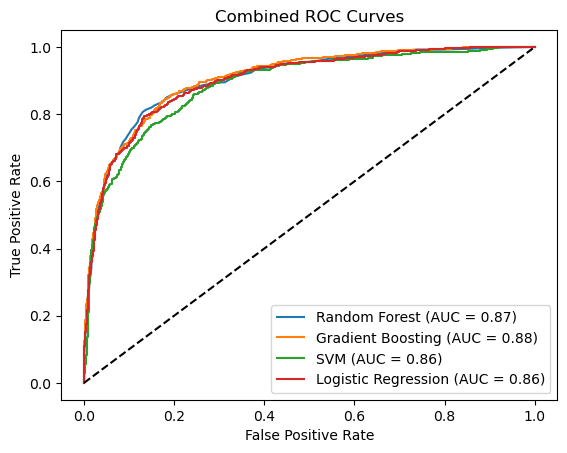


Model: Random Forest
AUC ROC: 0.87
Precision: 0.72
Recall: 0.68
Accuracy: 0.77
F1 Score: 0.68

Model: Gradient Boosting
AUC ROC: 0.88
Precision: 0.69
Recall: 0.66
Accuracy: 0.75
F1 Score: 0.66

Model: SVM
AUC ROC: 0.86
Precision: 0.68
Recall: 0.62
Accuracy: 0.73
F1 Score: 0.63

Model: Logistic Regression
AUC ROC: 0.86
Precision: 0.70
Recall: 0.64
Accuracy: 0.76
F1 Score: 0.64

Predictions using Random Forest:
['Dropout' 'Graduate' 'Graduate' 'Graduate' 'Dropout' 'Enrolled'
 'Graduate' 'Graduate' 'Graduate' 'Graduate']

Predictions using Gradient Boosting:
['Dropout' 'Graduate' 'Graduate' 'Graduate' 'Dropout' 'Enrolled'
 'Graduate' 'Graduate' 'Graduate' 'Graduate']

Predictions using SVM:
['Dropout' 'Graduate' 'Graduate' 'Graduate' 'Dropout' 'Enrolled'
 'Graduate' 'Graduate' 'Graduate' 'Graduate']

Predictions using Logistic Regression:
['Dropout' 'Graduate' 'Graduate' 'Graduate' 'Dropout' 'Enrolled'
 'Graduate' 'Graduate' 'Graduate' 'Graduate']


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score, roc_curve

# Assuming you have already loaded the 'students' DataFrame as mentioned earlier

# Preprocess the categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    students[column] = label_encoder.fit_transform(students[column])

# Prepare the data
X = students.drop(columns=['Target'])
y = students['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary to store models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, multi_class='ovr')
}

# Create a dictionary to store evaluation metrics
evaluation_metrics = {}

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)
    
    # Calculate evaluation metrics
    auc_roc = roc_auc_score(pd.get_dummies(y_test), y_pred_proba, multi_class='ovr', average='macro')
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Store evaluation metrics in the dictionary
    evaluation_metrics[model_name] = {
        'AUC ROC': auc_roc,
        'Precision': precision,
        'Recall': recall,
        'Accuracy': accuracy,
        'F1 Score': f1
    }
    
    # Plot ROC curve for each class (multi-class scenario)
    fpr, tpr, _ = roc_curve(pd.get_dummies(y_test).values.ravel(), y_pred_proba.ravel())
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_roc:.2f})')

# Plot combined ROC curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curves')
plt.legend(loc='lower right')
plt.show()

# Display evaluation metrics for each model
for model_name, metrics in evaluation_metrics.items():
    print(f"\nModel: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.2f}")

# Predictions for 10 students using each model
sample_students = X.sample(10, random_state=42)
for model_name, model in models.items():
    predictions = model.predict(sample_students)
    print(f"\nPredictions using {model_name}:")
    print(predictions)
